In [628]:
import pandas as pd
from sklearn import decomposition
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#import plotly.plotly as py
#from plotly.graph_objs import *
#plt.rcParams['figure.figsize'] = (20.0, 14.0)
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [629]:
df=pd.read_csv("./vice.csv")
len(df)

5198

In [630]:
df.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,TM,TG,PID,PF,PERS,AP,APO,knowledgeArea,classification,code
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,...,0.00,0.91,0.67,3.36,1.82,0.00,0.0,Ingeniería y Tecnología,C,COL0033023
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,...,0.00,0.00,1.09,1.82,1.82,0.00,0.0,Ciencias Naturales,C,COL0040519
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.00,1.68,0.00,0.00,3.36,3.28,0.0,Ciencias Médicas y de la Salud,A,COL0120245
3,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.36,0.00,0.36,0.00,0.00,1.82,0.0,Ingeniería y Tecnología,A,COL0110982
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,0.00,0.00,3.82,8.85,4.76,0.00,0.0,Ingeniería y Tecnología,B,COL0165935


https://scienti.colciencias.gov.co/gruplac/jsp/Medicion/graficas/verPerfiles.jsp?id_convocatoria=19&nroIdGrupo=00000000001840

- Coordenadas paralelas
- Variabilida de los datos
- Correlaciones
- PCA componentes, variabilidad
- kmeans
- neighbors
- score para las metricas
- colores https://learnui.design/tools/data-color-picker.html

In [631]:
#df.info()

In [632]:
df.knowledgeArea.unique()

array(['Ingeniería y Tecnología', 'Ciencias Naturales',
       'Ciencias Médicas y de la Salud', 'Ciencias Sociales',
       'Ciencias Agrícolas', 'Humanidades'], dtype=object)

In [633]:
df.classification.unique()

array(['C', 'A', 'B', 'A1', 'reconocido'], dtype=object)

In [634]:
area=df.loc[df.knowledgeArea=='Ciencias Naturales']
len(areas)

970

In [635]:
ga1=area.loc[area.classification=='A1']
ga1=ga1._get_numeric_data()
ga1=ga1.loc[:,:'APO']
ga=area.loc[area.classification=='A']
ga=ga.loc[:,:'APO']
gb=area.loc[area.classification=='B']
gb=gb.loc[:,:'APO']
gc=area.loc[area.classification=='C']
gc=gc.loc[:,:'APO']
grec=area.loc[area.classification=='reconocido']
grec=grec.loc[:,:'APO']

In [663]:
ga1['categ']='A1'
ga['categ']='A'
gb['categ']='B'
gc['categ']='C'
grec['categ']='rec'
res=ga1.copy()
#res=ga.copy()
#res=gb.copy()
#res=gc.copy()
#res=res.append(ga)
#res=res.append(gb)
#res=res.append(gc)
res=res.append(grec)
print(len(res))
res.head()

239


,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCE,TD,TM,TG,PID,PF,PERS,AP,APO,categ
248,0.0,2.0,6.0,3.0,4.0,0.0,7.0,2.0,6.0,7.0,...,7.88,0.00,5.61,22.11,3.18,0.0,0.00,1.82,0.0,A1
577,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.88,0.00,0.91,3.47,0.00,0.0,0.00,2.69,0.0,A1
647,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,13.35,3.36,1.68,5.49,0.36,0.0,1.82,0.00,0.0,A1
671,0.0,1.0,6.0,4.0,2.0,1.0,1.0,0.0,1.0,4.0,...,15.69,3.51,5.77,3.94,6.20,0.0,0.00,0.00,0.0,A1
692,3.0,5.0,7.0,21.0,15.0,0.0,2.0,11.0,18.0,18.0,...,32.73,4.76,14.46,6.93,13.12,0.0,20.28,0.00,0.0,A1


In [686]:
res.describe()['MR']

count    239.000000
mean       0.007741
std        0.119667
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.850000
Name: MR, dtype: float64

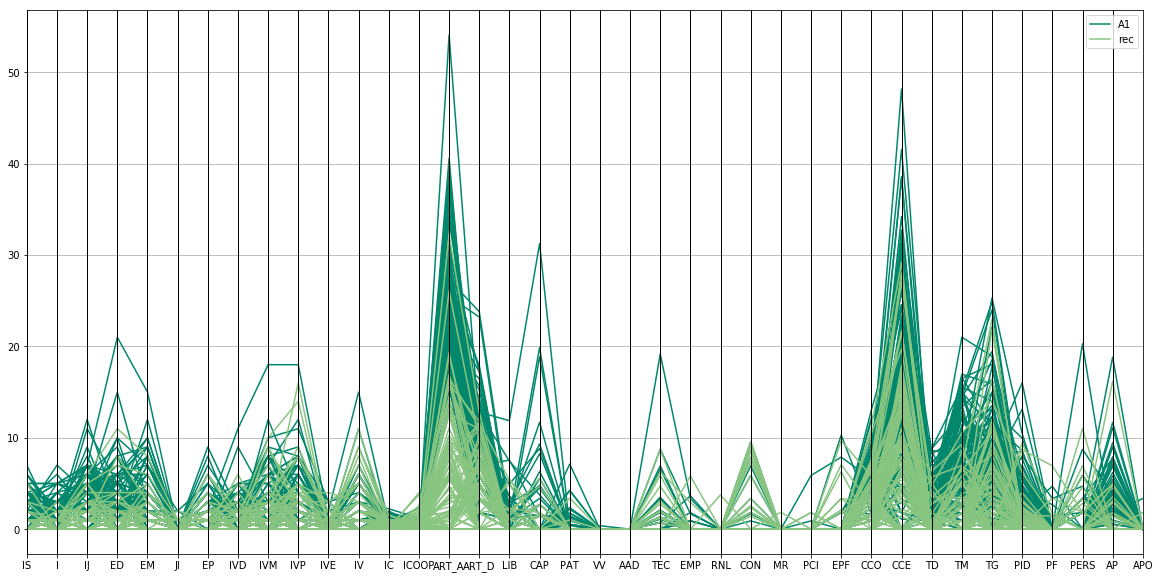

In [665]:
pd.plotting.parallel_coordinates(res,'categ',color=('#00876c','#88c580','#ffff9d','#f7a258','#d43d51'))

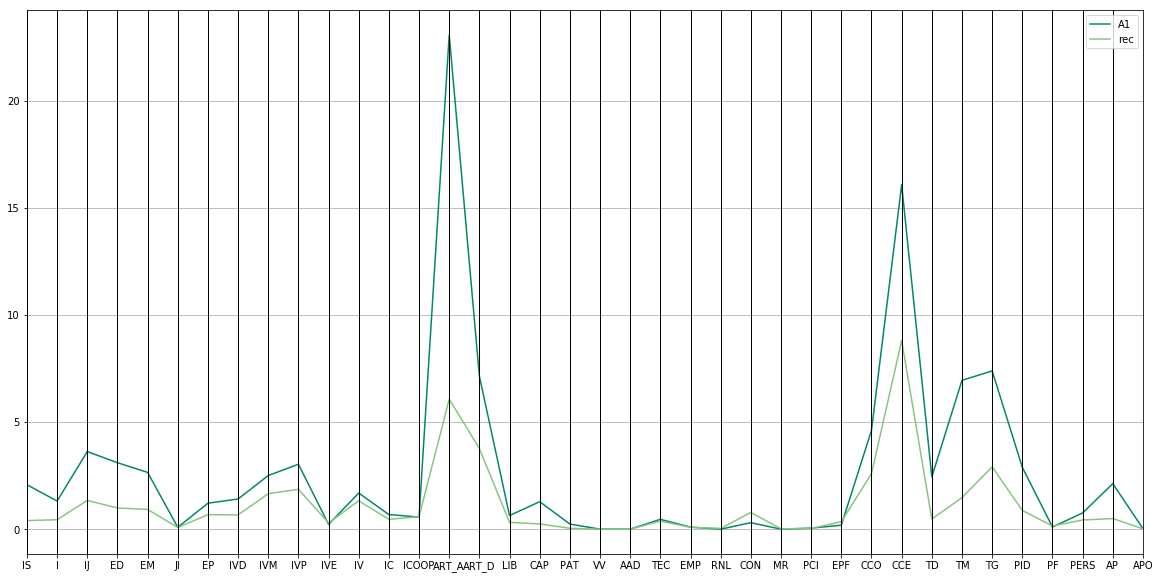

In [666]:
ga1des=ga1.describe()
#ga1des=ga1des.drop('max')
#ga1des=ga1des.loc[ga1des.index=='mean']
#ga1des=ga1des.loc[ga1des.index=='min']
ga1des['categ']='A1'
gades=ga.describe()
#gades=gades.drop('count')
gades['categ']='A'
gbdes=gb.describe()
#gbdes=gbdes.drop('count')
gbdes['categ']='B'
gcdes=gc.describe()
#gcdes=gcdes.drop('count')
gcdes['categ']='C'
grecdes=grec.describe()
#grecdes=grecdes.drop('min')
#grecdes=grecdes.loc[grecdes.index=='mean']
#grecdes=grecdes.loc[grecdes.index=='max']
grecdes['categ']='rec'

filtres=ga1des.copy()
#filtres=gades.copy()
#filtres=gbdes.copy()
#filtres=gcdes.copy()
#filtres=filtres.append(gades)
#filtres=filtres.append(gbdes)
#filtres=filtres.append(gcdes)
filtres=filtres.append(grecdes)
#filtres=filtres.drop('mean')
filtres=filtres.loc[filtres.index=='mean']
#filtres=filtres.loc[filtres.index=='max']
#filtres=filtres.loc[filtres.index=='50%']

pd.plotting.parallel_coordinates(filtres,'categ',color=('#00876c','#88c580','#ffff9d','#f7a258','#d43d51'))

In [1]:
dat=filtres._get_numeric_data()
names = list(dat.columns.values)
x = dat.values
print(x.shape)
y = filtres.loc[:,['categ']].values
x = StandardScaler().fit_transform(x)
xdf = pd.DataFrame(x,columns=names)
xdf['categ'] = pd.DataFrame(y)
pd.plotting.parallel_coordinates(xdf,'categ',color=('#00876c','#ffc580','#ffff9d','#f7a258','#d43d51'))

NameError: name 'filtres' is not defined

(239, 38)


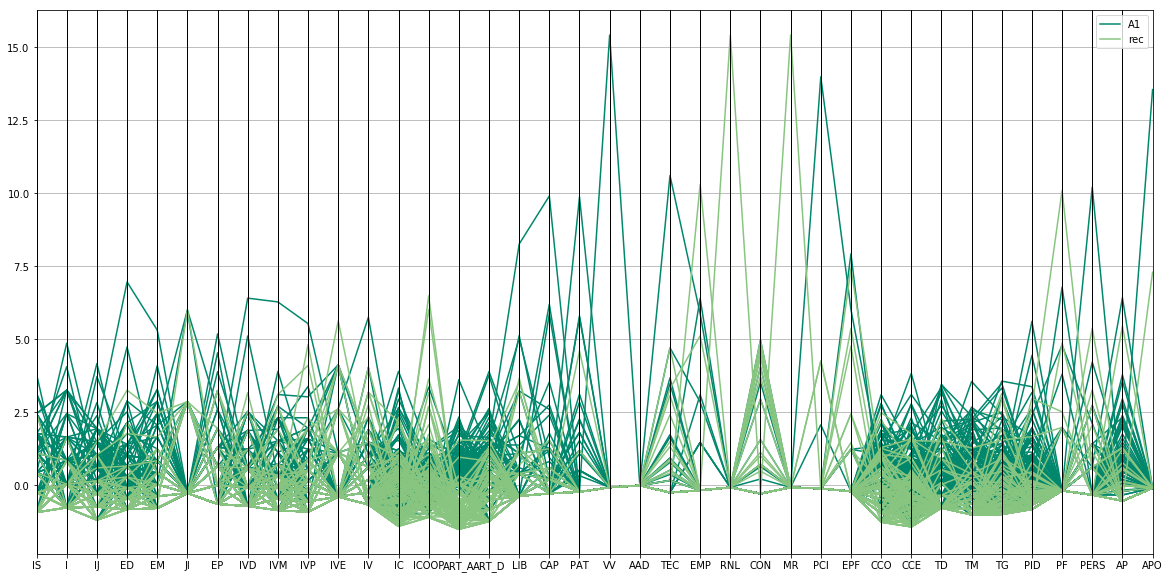

In [668]:
dat=res._get_numeric_data()
names=list(dat.columns.values)
x=dat.values
print(x.shape)
y = res.loc[:,['categ']].values
x = StandardScaler().fit_transform(x)
xdf=pd.DataFrame(x,columns=names)
xdf['categ']=pd.DataFrame(y)
pd.plotting.parallel_coordinates(xdf,'categ',color=('#00876c','#88c580','#ffff9d','#f7a258','#d43d51'))

[  5.79880478e-02   2.73372512e-02   3.86625232e-02   1.68440648e-02
   3.15392723e-02   5.05796606e-03   1.16785914e-02   2.22988512e-02
   8.47240673e-03   1.73178312e-02   5.00667696e-03   1.12370518e-02
   2.03041326e-02   1.76421763e-02   2.97355761e-01   2.49788977e-02
   1.91511213e-02   1.11556643e-02   3.80678265e-03   0.00000000e+00
   0.00000000e+00   7.38125973e-03   4.07218849e-05   0.00000000e+00
   9.05988195e-03   0.00000000e+00   7.74834695e-03   1.11187551e-03
   1.96455093e-02   2.97978753e-02   6.28272159e-02   1.32930911e-01
   2.38685853e-02   2.59715752e-02   6.60754410e-03   1.27904421e-02
   1.23831855e-02   0.00000000e+00]


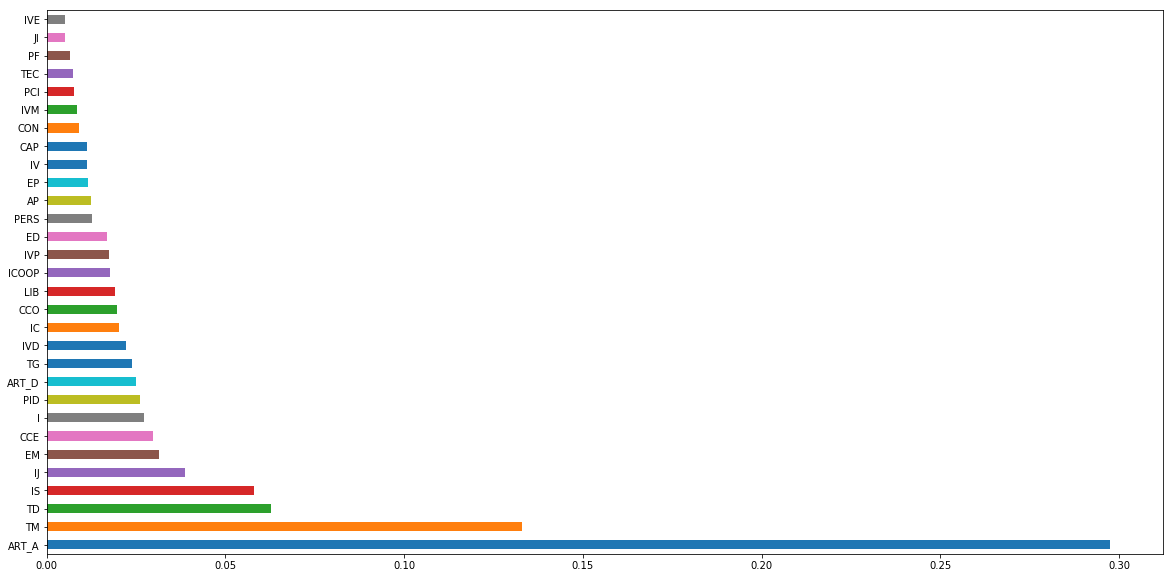

In [669]:
model = ExtraTreesClassifier()
model.fit(x,y.ravel())
print(model.feature_importances_)
(pd.Series(model.feature_importances_, index=names)
   .nlargest(30)
   .plot(kind='barh'))

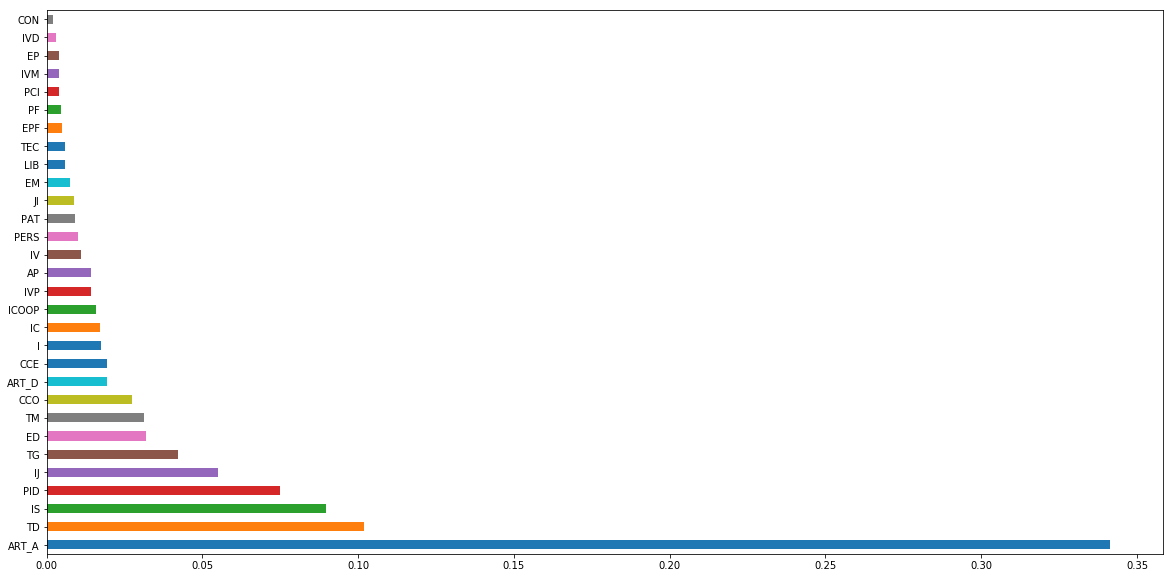

In [670]:
model = RandomForestClassifier()
model.fit(x,y.ravel())

(pd.Series(model.feature_importances_, index=names)
   .nlargest(30)
   .plot(kind='barh'))        # some method chaining, because it's sexy!

In [671]:
skpca=decomposition.PCA(n_components=13) # PCA(0.50)  RandomizedPCA()

xpca=skpca.fit_transform(x)
#xpca=skpca.fit(x)
print(xpca.shape)

(239, 13)


In [672]:
#xpcadf=pd.DataFrame(xpca)
#xpcadf['categ']=pd.DataFrame(y)
#pd.plotting.parallel_coordinates(xpcadf,'categ',color=('#FF0000','#00FF00'))

In [673]:
#skpca.components_
##xpca.components_

In [674]:
skpca.explained_variance_
##xpca.explained_variance_

array([ 6.42030383,  2.74502589,  2.3789169 ,  1.93269245,  1.80711277,
        1.50383629,  1.44542789,  1.23436796,  1.20928587,  1.15845268,
        1.05482638,  1.03746729,  0.97169502])

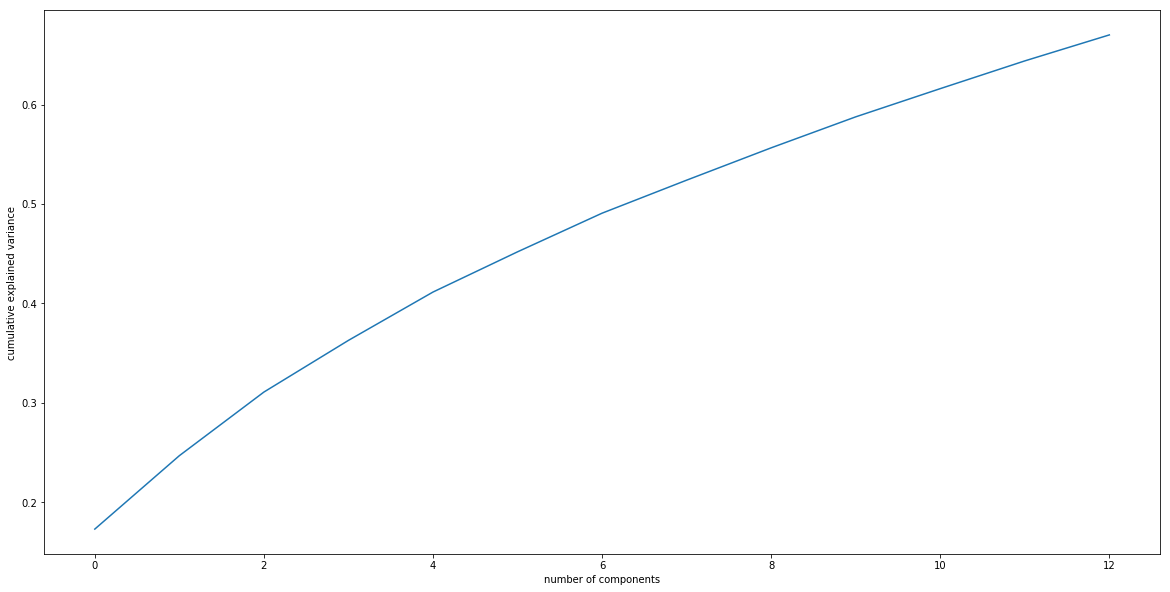

In [675]:
plt.plot(np.cumsum(skpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [676]:
nc=range(1,30)

In [677]:
kmeans = [KMeans(n_clusters=i) for i in nc]

In [678]:
score = [kmeans[i].fit(xpca).score(xpca) for i in range(len(kmeans))]
#score

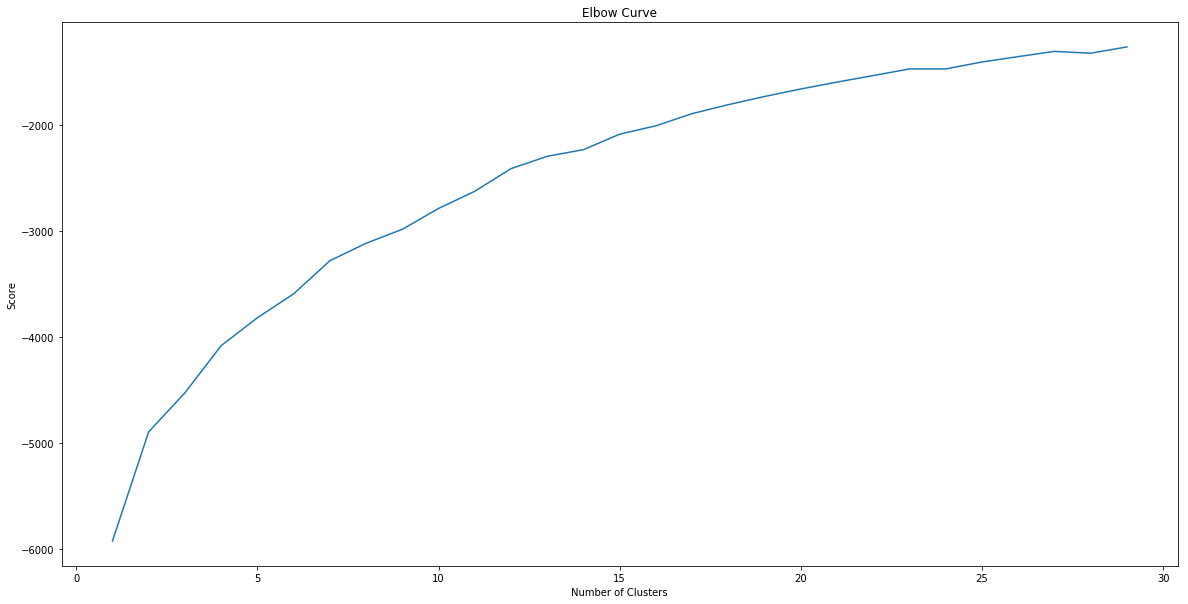

In [679]:
plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

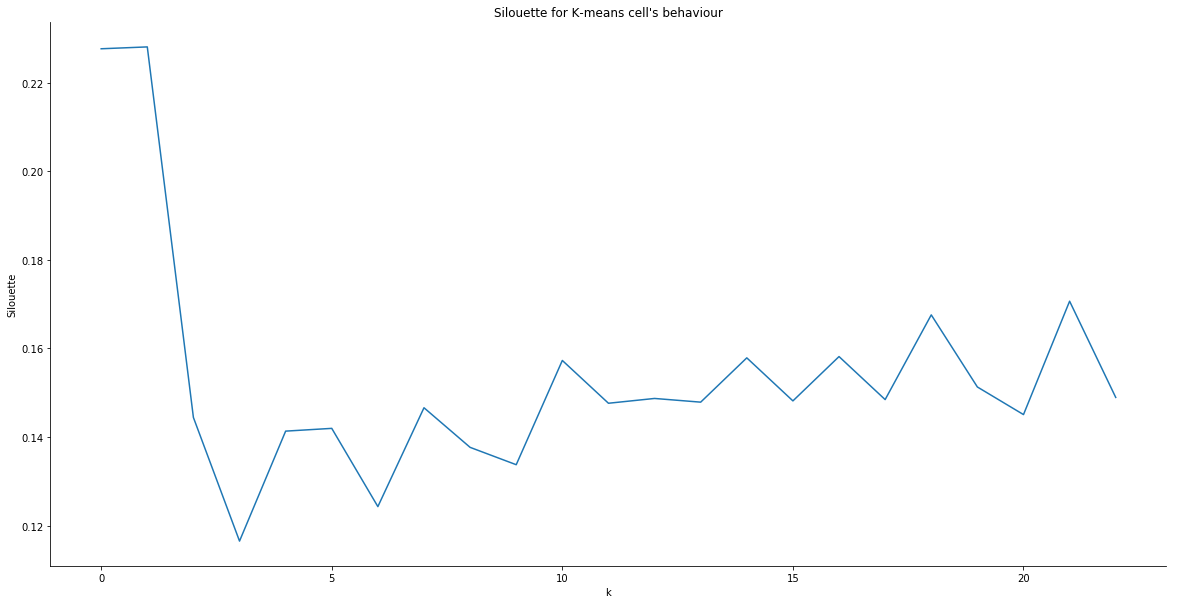

In [680]:
s = []
for n_clusters in range(2,25):
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(xpca)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(xpca, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

In [681]:
# Kmeans final, resultado
kmeans=KMeans(n_clusters=2)

In [682]:
kmeansoutput=kmeans.fit(xpca)
#kmeans.predict([[0, 0], [4, 4]])
#kmeans.cluster_centers_
kmeansoutput

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [683]:
#len(kmeansoutput.labels_)
#len(y.ravel())
#y.ravel()
#kmeansoutput.labels_
tmp=pd.DataFrame(kmeansoutput.labels_,columns=['klabels'])
tmp['original']=y
tmp['y']=1

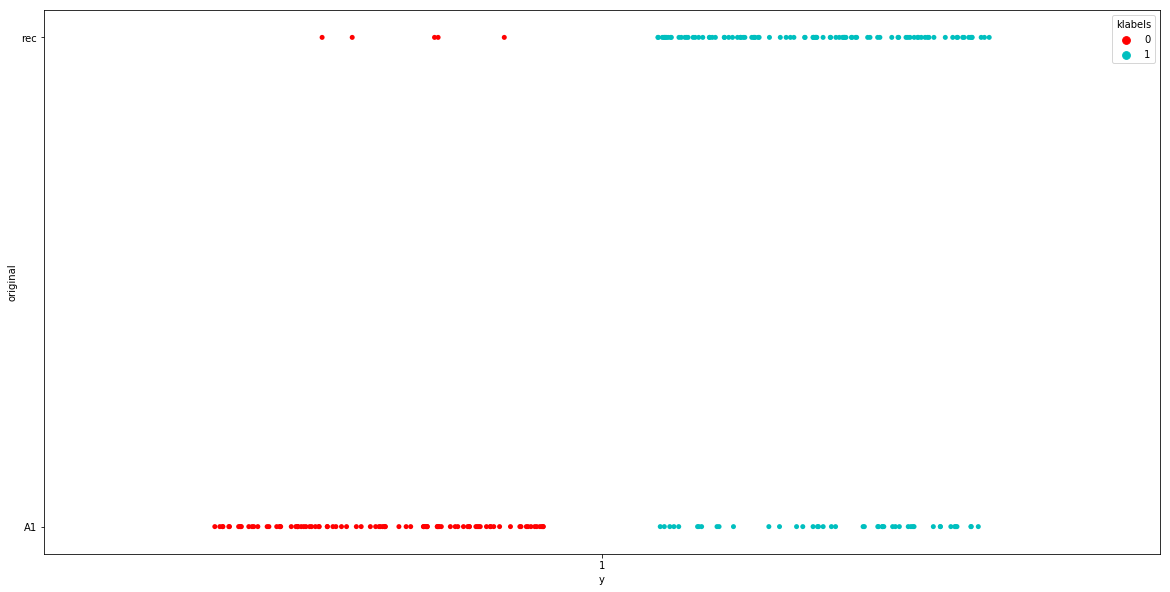

In [684]:
plt.figure('Cluster K-Means')
#sns.swarmplot(y='original', x='y',hue="klabels",dodge=True, orient='v',data=tmp, palette=["r", "c", "y","b"])
sns.stripplot(y='original', x='y',hue="klabels",dodge=True, orient='v', jitter=0.3 ,data=tmp, palette=["r", "c", "y","b"])
#plt.scatter(xpca[:,0],y.ravel(), c=kmeansoutput.labels_)
#plt.scatter(kmeansoutput.labels_,y.ravel(),c=kmeansoutput.labels_)

#plt.xlabel('PCx')
#plt.ylabel('True clases')
#plt.title('Cluster K-Means')
#plt.show()

In [614]:
df = pd.DataFrame({'Labels': y.ravel(), 'Clusters': kmeansoutput.labels_})
ct = pd.crosstab(df['Labels'], df['Clusters'])
print(ct)

Clusters    0   1    2  3
Labels                   
A          61  26   66  0
A1         16   8  113  0
B         128  41   36  1
C         336  24   12  0
rec        90   1   11  0


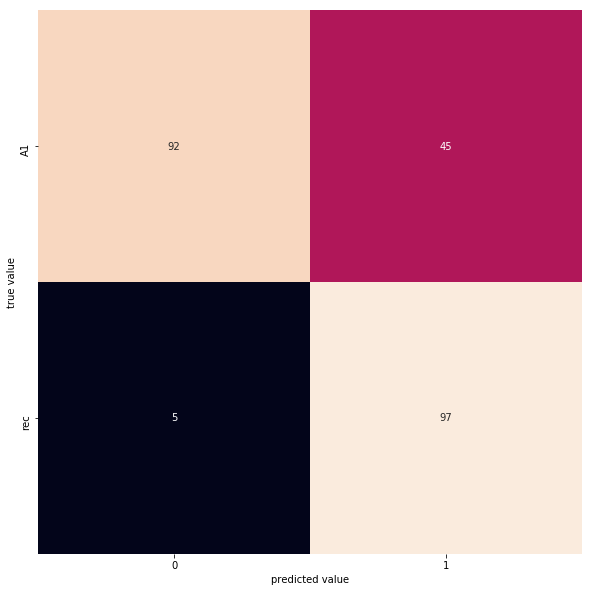

In [484]:
sns.heatmap(ct, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Correlaciones

In [615]:
crr=ga1.corr()

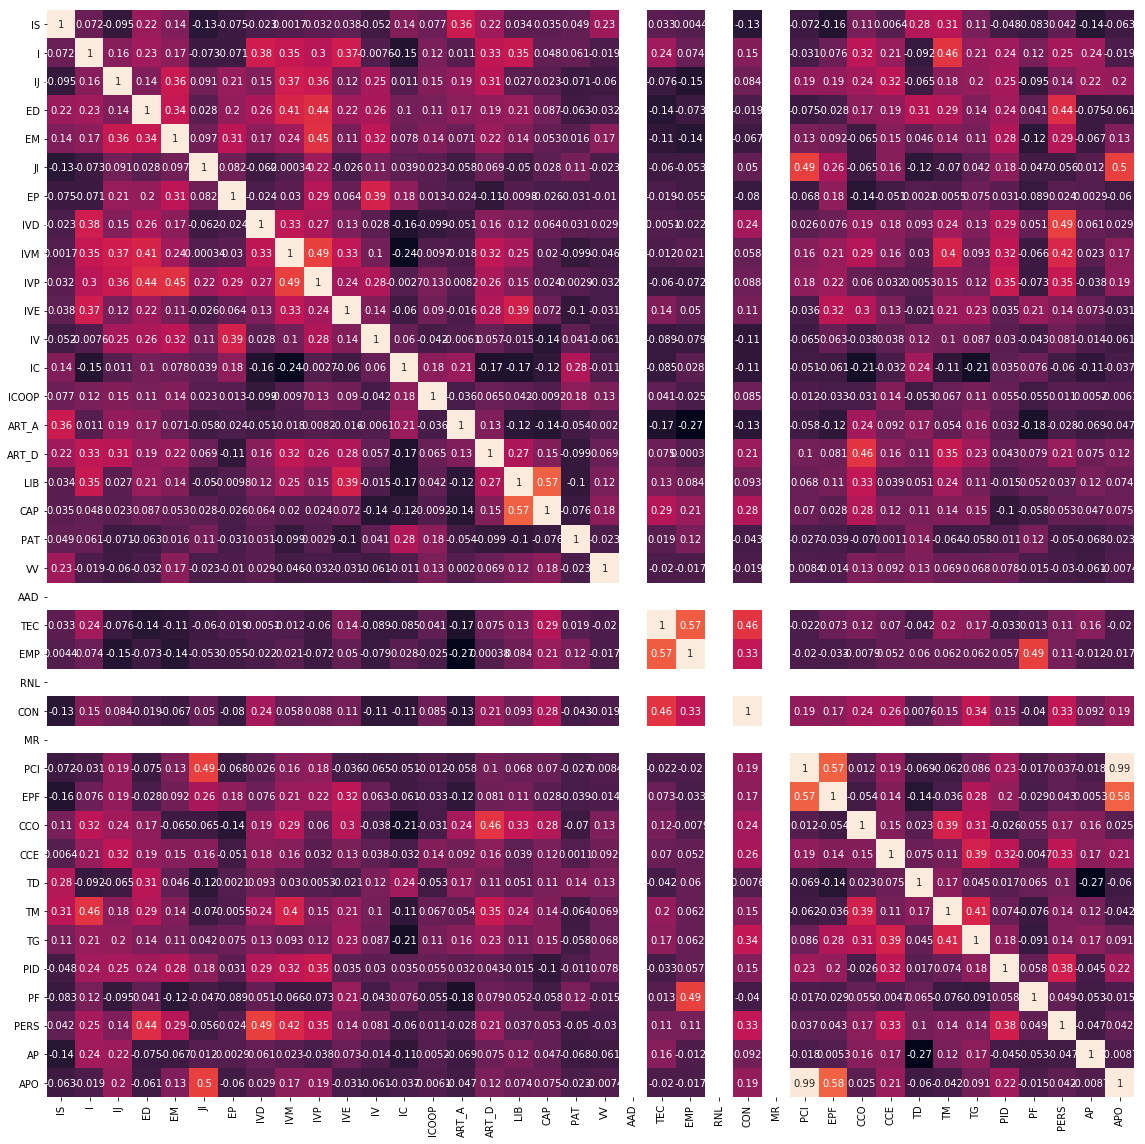

In [617]:
sns.heatmap(crr, square=True, annot=True, cbar=False)